In [52]:
'''This notebook classifies movie reviews as positive or negative using the text of the review. This is an example of binary—or two-class—classification, an important and widely applicable kind of machine learning problem.

We'll use the IMDB dataset that contains the text of 50,000 movie reviews from the Internet Movie Database. These are split into 25,000 reviews for training and 25,000 reviews for testing. The training and testing sets are balanced, meaning they contain an equal number of positive and negative reviews.

This notebook uses tf.keras, a high-level API to build and train models in TensorFlow. For a more advanced text classification tutorial using tf.keras, see the MLCC Text Classification Guide.'''
%matplotlib inline
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

1.12.0


In [22]:
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print("Training data loaded..")


Training data loaded..
word Index loaded..


In [29]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)
print("word Dict loaded...")

word Dict loaded...


In [34]:
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])
print("model compiled.. ")
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]


model compiled.. 


In [39]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)
print("model trained...")

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 2s 111us/step - loss: 0.6916 - acc: 0.5161 - val_loss: 0.6896 - val_acc: 0.5331
Epoch 2/40
15000/15000 [==============================] - 1s 85us/step - loss: 0.6851 - acc: 0.6012 - val_loss: 0.6810 - val_acc: 0.6790
Epoch 3/40
15000/15000 [==============================] - 1s 82us/step - loss: 0.6721 - acc: 0.6895 - val_loss: 0.6652 - val_acc: 0.7075
Epoch 4/40
15000/15000 [==============================] - 1s 85us/step - loss: 0.6496 - acc: 0.7489 - val_loss: 0.6406 - val_acc: 0.7284
Epoch 5/40
15000/15000 [==============================] - 1s 81us/step - loss: 0.6171 - acc: 0.7777 - val_loss: 0.6063 - val_acc: 0.7805
Epoch 6/40
15000/15000 [==============================] - 1s 91us/step - loss: 0.5765 - acc: 0.8099 - val_loss: 0.5670 - val_acc: 0.8126
Epoch 7/40
15000/15000 [==============================] - 1s 83us/step - loss: 0.5311 - acc: 0.8354 - val_loss: 0.5254 - val_ac

In [48]:
results = model.evaluate(test_data, test_labels)
print(results)
 

25000/25000 [==============================] - 1s 52us/step
[0.3313488709592819, 0.87244]


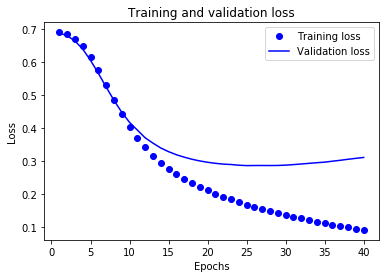

In [53]:
history_dict = history.history
history_dict.keys()
 
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


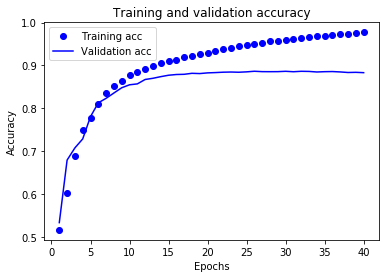

In [54]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()